# <center>**NumPy**</center>

### [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python

* a powerful N-dimensional array object
* useful linear algebra, Fourier transform, and random number capabilities
* Pandas and scikit-learn is based on NumPy
* open source, free

### NumPy ndarray v.s. Python List

* __Fixed Size__. NumPy数组创建的时候有一个固定的大小，不像Python列表可以动态地增加要素。改变一个ndarray的大小会创建一个新的数组并删除原数组.
* __Fixed Type__. NumPy数组中的要素必须是同一个数据类型，从而在内存中是同样的大小。
* __High Efficiency__. NumPy数组更有利于大规模数据的高级数学运算。通常来说，这些运算执行更高效，并且代码量比用Python自带的序列来实现更少。
* __Fundamental__. 越来越多的科学和数学Python包使用NumPy数组；虽然这些包通常支持Python序列输入，但它们通常在处理前把输入转化为NumPy数组。

> Python List有更高的灵活性，但牺牲了效率和速度。Numpy ndarray灵活性更低，但效率更高。

![ndarray_vs_list](./pics/ndarray_vs_list.png)

### Quick review of Python List

In [1]:
# define a list from 0 to 10 (not include 10)
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
# show element type
type(L[0])

int

In [3]:
# convert type from int to string
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
# show element type
type(L2[0])

str

In [5]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

### Performance comparison

In [1]:
import numpy as np

In [37]:
# 1 million random integers between 1 and 100
np.random.seed(0)
big_array = np.random.randint(1, 100, (1_000_000,))

In [41]:
# compute reciprocals in regular python
def compute_reciprocals(values):
    output = np.zeros((len(values),), dtype=float)
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [47]:
# regular Python function to compute reciprocal for 1 million random int
%timeit compute_reciprocals(big_array)

3.39 s ± 729 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
# same computation in NumPy array
%timeit 1.0/big_array

6.39 ms ± 714 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 1. NumPy Array Basics

In [49]:
# Numpy n-dimension array (ndarray)
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [50]:
# ndarray must have same type, auto cast
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [51]:
# specify type
np.array([1, 2, 3, 4], dtype=float)

array([1., 2., 3., 4.])

In [52]:
# 2 dimension of array
np.array([[2, 3, 4], [4, 5, 6], [6, 7, 8]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [55]:
# 1 dimension array with all 0s, type is int
np.zeros((10,), dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
# 3x5 array with all float 1.0
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [61]:
# 3x5 matrix filled by pi
np.full((3, 5), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [63]:
# 0 to 20, 20 not included, step is 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [65]:
# 5 points from 0 to 1
np.linspace(0, 1, 5, endpoint=True)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [66]:
np.linspace(0, 1, 5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [67]:
# generate 3x3 array with random float from 0 to 1
np.random.random((3, 3))

array([[0.60846394, 0.7179427 , 0.43036406],
       [0.25241011, 0.97572458, 0.1197632 ],
       [0.20856888, 0.23983126, 0.39034023]])

In [68]:
# generate 3x3 array with Guassian (Normal) distribution ~ N(0,1)
np.random.normal(0, 1, size=(3, 3))

array([[ 1.01044915,  0.31737152, -1.30840814],
       [-0.97496232,  1.57774258, -0.87026069],
       [ 0.91052841,  1.36337822,  0.03155953]])

In [69]:
# generate 3x3 array with random int from 0 to 10
np.random.randint(0, 10, size=(3, 3))

array([[8, 6, 5],
       [5, 6, 0],
       [3, 1, 8]])

In [72]:
# 5x5 identity matrix
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [73]:
# create 1d array, access elements
x1 = np.random.randint(0, 10, size=(6,))
x1

array([6, 9, 9, 7, 6, 0])

In [76]:
print('x1 elements: ', x1[0], x1[4], x1[-1], x1[-2])

x1 elements:  6 6 0 6


In [77]:
# create 2d array, access elements
x2 = np.random.randint(0, 10, size=(3, 4))
x2

array([[9, 1, 1, 3],
       [9, 2, 6, 1],
       [1, 7, 8, 9]])

In [78]:
print('x2 elements: ', x2[0, 0], x2[2, 0], x2[2, -1])

x2 elements:  9 1 9


In [81]:
### create 3d array, access elements
x3 = np.random.randint(0, 10, size=(3, 4, 5))
x3

array([[[1, 4, 8, 5, 9],
        [7, 8, 9, 6, 7],
        [3, 3, 7, 8, 3],
        [6, 3, 9, 2, 2]],

       [[4, 7, 8, 7, 1],
        [8, 2, 1, 6, 0],
        [0, 0, 5, 0, 5],
        [1, 4, 4, 7, 8]],

       [[1, 9, 5, 0, 2],
        [3, 0, 3, 5, 9],
        [2, 8, 2, 2, 7],
        [4, 6, 1, 6, 5]]])

In [90]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int32
itemsize: 4 bytes
nbytes: 240 bytes


In [93]:
x3[0, 0, 0] = 999
x3

array([[[999,   4,   8,   5,   9],
        [  7,   8,   9,   6,   7],
        [  3,   3,   7,   8,   3],
        [  6,   3,   9,   2,   2]],

       [[  4,   7,   8,   7,   1],
        [  8,   2,   1,   6,   0],
        [  0,   0,   5,   0,   5],
        [  1,   4,   4,   7,   8]],

       [[  1,   9,   5,   0,   2],
        [  3,   0,   3,   5,   9],
        [  2,   8,   2,   2,   7],
        [  4,   6,   1,   6,   5]]])

## 2. NumPy Array Slicing

In [94]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
x[:5]

array([0, 1, 2, 3, 4])

In [96]:
x[5:]

array([5, 6, 7, 8, 9])

In [97]:
x[4:7]

array([4, 5, 6])

In [98]:
x[::2]

array([0, 2, 4, 6, 8])

In [99]:
x[1::2]

array([1, 3, 5, 7, 9])

In [100]:
x2

array([[9, 1, 1, 3],
       [9, 2, 6, 1],
       [1, 7, 8, 9]])

In [101]:
# first 2 rows, first 3 columns
x2[:2, :3]

array([[9, 1, 1],
       [9, 2, 6]])

In [104]:
# first 3 rows, every other columns
x2[:3, ::2]

array([[9, 1],
       [9, 6],
       [1, 8]])

In [105]:
# reverse rows and columns
x2[::-1, ::-1]

array([[9, 8, 7, 1],
       [1, 6, 2, 9],
       [3, 1, 1, 9]])

In [106]:
# first row
x2[0]

array([9, 1, 1, 3])

In [107]:
# first column
x2[:, 0]

array([9, 9, 1])

### View v.s. Copy

In [108]:
x2

array([[9, 1, 1, 3],
       [9, 2, 6, 1],
       [1, 7, 8, 9]])

In [110]:
x2_sub = x2[:2, :2]  # view
x2_sub

array([[9, 1],
       [9, 2]])

In [111]:
x2_sub[0, 0] = 99
x2_sub

array([[99,  1],
       [ 9,  2]])

In [112]:
x2

array([[99,  1,  1,  3],
       [ 9,  2,  6,  1],
       [ 1,  7,  8,  9]])

In [113]:
x2_sub_copy = x2[:2, :2].copy()    # copy
x2_sub_copy

array([[99,  1],
       [ 9,  2]])

In [114]:
x2_sub_copy[0, 0] = 11
x2_sub_copy

array([[11,  1],
       [ 9,  2]])

In [115]:
x2

array([[99,  1,  1,  3],
       [ 9,  2,  6,  1],
       [ 1,  7,  8,  9]])

## 3. Reshape

In [119]:
grid = np.reshape(np.arange(1, 10), (3, 3), 'C')
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [118]:
grid = np.arange(1, 11).reshape((2, 5))
grid

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [120]:
x = np.array([1, 2, 3])
x.shape

(3,)

In [123]:
print(x.reshape((1, 3)))
print(x.reshape((1, 3)).shape)

[[1 2 3]]
(1, 3)


## 4. Concatenation and Splitting

In [124]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = np.array([99, 99, 99])

In [127]:
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [128]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
grid

array([[1, 2, 3],
       [4, 5, 6]])

In [134]:
np.concatenate([grid, grid], axis=0)  # stack by rows

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [138]:
np.concatenate([grid, grid], axis=1)   # stack by columns

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [139]:
np.vstack((grid, grid))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [140]:
np.hstack((grid, grid))

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [141]:
x = np.array([1, 2, 3, 99, 99, 321])

In [142]:
# split at position 3 and 5
x1, x2, x3 = np.split(x, [3, 5])
print(x1)
print(x2)
print(x3)

[1 2 3]
[99 99]
[321]


In [143]:
grid = np.arange(0, 16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [144]:
# split grid vertically into 2 arrays evenly
upper, lower = np.vsplit(grid, 2)
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [149]:
# split grid horizontally into 2 arrays evenly
left, right = np.hsplit(grid, 2)
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [150]:
# split grid vertically at position 1
np.split(grid, [1], axis=0)

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [152]:
# split grid horizontally at position 3
np.split(grid, [3], axis=1)

[array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14]]),
 array([[ 3],
        [ 7],
        [11],
        [15]])]

## 5. Numeric Operations

In [154]:
values = np.random.randint(1, 10, size=(10,))
values

array([2, 5, 1, 8, 5, 3, 1, 6, 3, 5])

In [155]:
1.0 / values

array([0.5       , 0.2       , 1.        , 0.125     , 0.2       ,
       0.33333333, 1.        , 0.16666667, 0.33333333, 0.2       ])

In [156]:
values * 2

array([ 4, 10,  2, 16, 10,  6,  2, 12,  6, 10])

In [158]:
values * values

array([ 4, 25,  1, 64, 25,  9,  1, 36,  9, 25])

In [159]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [160]:
values**3

array([  8, 125,   1, 512, 125,  27,   1, 216,  27, 125], dtype=int32)

In [161]:
values // 2

array([1, 2, 0, 4, 2, 1, 0, 3, 1, 2], dtype=int32)

In [162]:
values % 4

array([2, 1, 1, 0, 1, 3, 1, 2, 3, 1], dtype=int32)

In [164]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [165]:
np.sin(theta)

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

In [168]:
np.matrix.round(np.sin(theta), 10)

array([0., 1., 0.])

In [169]:
values

array([2, 5, 1, 8, 5, 3, 1, 6, 3, 5])

In [170]:
np.log(values)

array([0.69314718, 1.60943791, 0.        , 2.07944154, 1.60943791,
       1.09861229, 0.        , 1.79175947, 1.09861229, 1.60943791])

In [171]:
np.log2(values)

array([1.        , 2.32192809, 0.        , 3.        , 2.32192809,
       1.5849625 , 0.        , 2.5849625 , 1.5849625 , 2.32192809])

In [172]:
np.log10(values)

array([0.30103   , 0.69897   , 0.        , 0.90308999, 0.69897   ,
       0.47712125, 0.        , 0.77815125, 0.47712125, 0.69897   ])

In [173]:
np.power(3, values)

array([   9,  243,    3, 6561,  243,   27,    3,  729,   27,  243],
      dtype=int32)

In [174]:
np.exp(values)

array([7.38905610e+00, 1.48413159e+02, 2.71828183e+00, 2.98095799e+03,
       1.48413159e+02, 2.00855369e+01, 2.71828183e+00, 4.03428793e+02,
       2.00855369e+01, 1.48413159e+02])

In [175]:
np.exp2(values)

array([  4.,  32.,   2., 256.,  32.,   8.,   2.,  64.,   8.,  32.])

In [176]:
grid_left = values.reshape((2,5))
grid_left

array([[2, 5, 1, 8, 5],
       [3, 1, 6, 3, 5]])

In [177]:
grid_right = values.reshape((5,2))
grid_right

array([[2, 5],
       [1, 8],
       [5, 3],
       [1, 6],
       [3, 5]])

#### np.dot 矩阵的点乘

In [181]:
grid2by2 = np.dot(grid_left, grid_right)
grid2by2

array([[ 37, 126],
       [ 55,  84]])

In [182]:
grid5by5 = np.dot(grid_right, grid_left)
grid5by5

array([[19, 15, 32, 31, 35],
       [26, 13, 49, 32, 45],
       [19, 28, 23, 49, 40],
       [20, 11, 37, 26, 35],
       [21, 20, 33, 39, 40]])

In [185]:
grid5by5.sum()
# np.sum(grid5by5)

738

In [188]:
grid5by5.min()
# np.min(grid5by5)

11

In [189]:
grid5by5.max()
# np.max(grid5by5)

49

In [191]:
grid5by5.mean()
# np.mean(grid5by5)

29.52

## 6. Bool operation

In [192]:
values

array([2, 5, 1, 8, 5, 3, 1, 6, 3, 5])

In [193]:
values > 5

array([False, False, False,  True, False, False, False,  True, False,
       False])

In [194]:
values[values > 5]

array([8, 6])

In [195]:
values[values <= 5]

array([2, 5, 1, 5, 3, 1, 3, 5])

In [197]:
len(values[values > 5])

2

In [200]:
np.count_nonzero(values > 5)

2

In [201]:
np.sum(values <= 5)

8

In [202]:
grid5by5

array([[19, 15, 32, 31, 35],
       [26, 13, 49, 32, 45],
       [19, 28, 23, 49, 40],
       [20, 11, 37, 26, 35],
       [21, 20, 33, 39, 40]])

In [204]:
grid5by5 > 30

array([[False, False,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False,  True, False,  True],
       [False, False,  True,  True,  True]])

In [206]:
np.sum(grid5by5 > 30)

13

In [207]:
# sum rows
np.sum(grid5by5 > 30, axis=0)

array([0, 0, 4, 4, 5])

In [208]:
# sum columns
np.sum(grid5by5 > 30, axis=1)

array([3, 3, 2, 2, 3])

<hr />

## 7. Picture as Numpy Array

In [214]:
from skimage import io
import matplotlib.pyplot as plt

In [215]:
image = io.imread('./data/opera-house.jpg')

In [216]:
image.shape

(890, 1600, 3)

890 * 1600个像素 (pixel), 每个像素是一个三原色 **RGB** 的组合

In [217]:
# RGB
image[0, 0]

array([112, 170, 254], dtype=uint8)

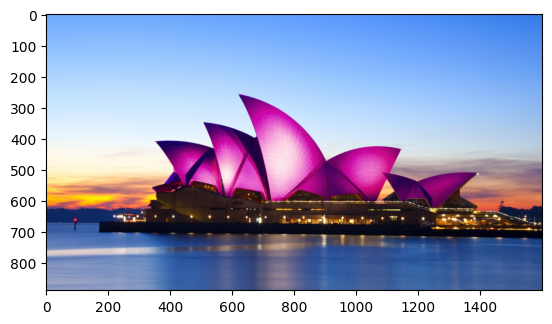

In [218]:
plt.imshow(image)

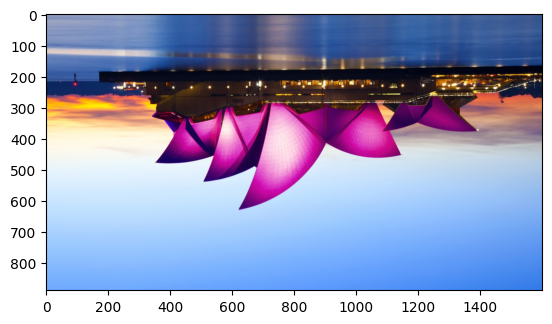

In [219]:
# 890行逆序
plt.imshow(image[::-1])

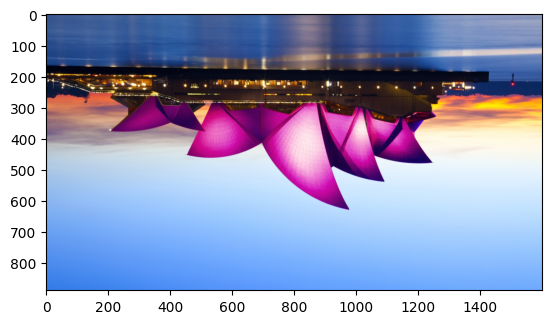

In [220]:
# 890行逆序，1600列逆序
plt.imshow(image[::-1, ::-1])

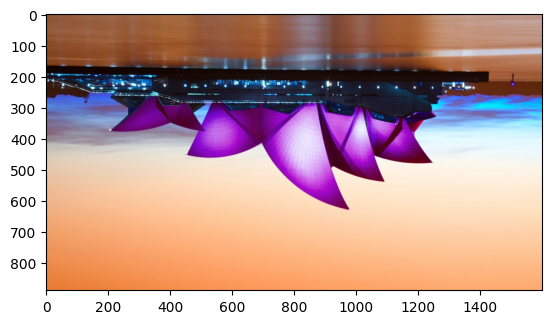

In [221]:
# 890行逆序，1600列逆序, RGB -> BGR
plt.imshow(image[::-1, ::-1, ::-1])

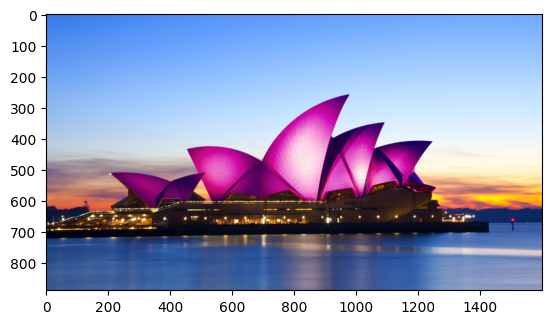

In [222]:
# 890行不变， 1600列逆序
plt.imshow(image[:, ::-1])

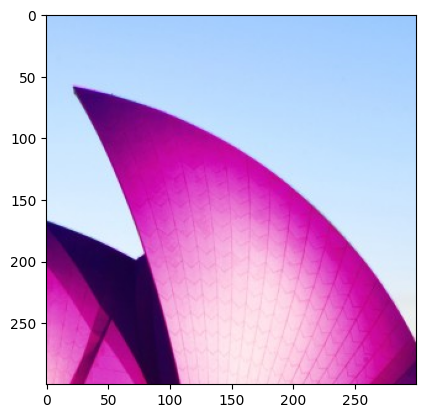

In [223]:
# 选取子图
plt.imshow(image[200:500, 600:900])

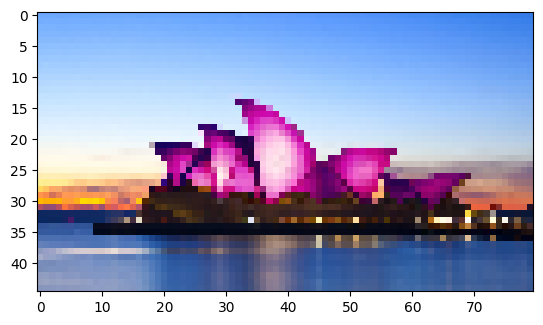

In [224]:
# 行列每个20个像素去一个点，降低分辨率
plt.imshow(image[::20, ::20])

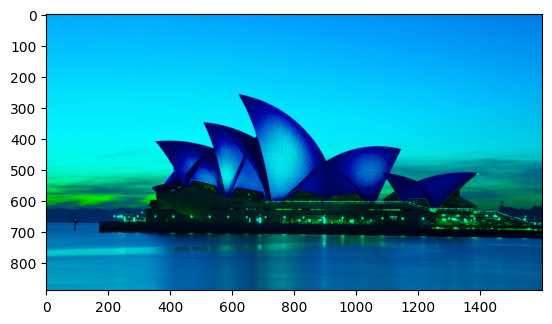

In [225]:
block_red = image.copy()
# 行列不变，三原色 RGB 中，R被设置为0
block_red[:, :, 0] = 0
plt.imshow(block_red)

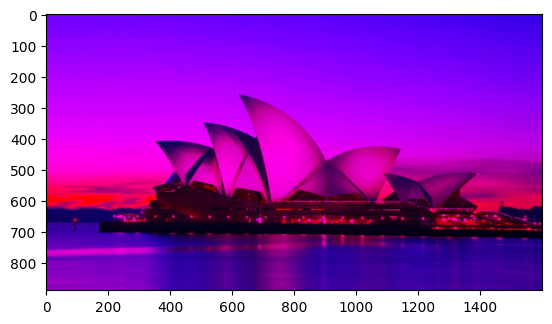

In [226]:
block_green = image.copy()
# 行列不变，三原色 RGB 中，G被设置为0
block_green[:, :, 1] = 0
plt.imshow(block_green)

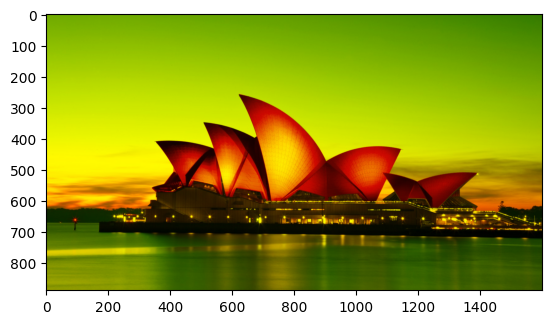

In [227]:
block_blue = image.copy()
# 行列不变，三原色 RGB 中，B被设置为0
block_blue[:, :, 2] = 0
plt.imshow(block_blue)

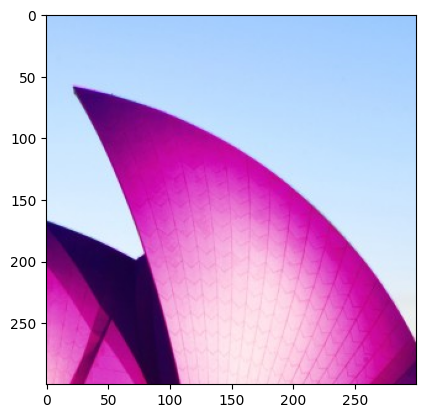

In [234]:
mosaic = image.copy()
# 选取要打马赛克的区域
sub = mosaic[200:500, 600:900]
plt.imshow(sub)

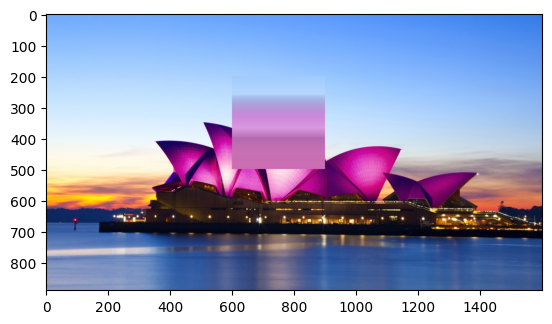

In [235]:
for i in range(0, 100):
    start = i * 3
    end = (i + 1) * 3
    sub[start:end, :, 0] = np.mean(sub[start:end, :, 0])
    sub[start:end, :, 1] = np.mean(sub[start:end, :, 1])
    sub[start:end, :, 2] = np.mean(sub[start:end, :, 2])

plt.imshow(mosaic)

In [236]:
print(sub[:3, :, 0].shape)
print(sub[:3, :, [0]].shape)

(3, 300)
(3, 300, 1)


In [237]:
np.mean(np.arange(0, 9).reshape((3, 3, 1)))

4.0

In [238]:
mosaic = image.copy()
sub = mosaic[200:500, 600:900]

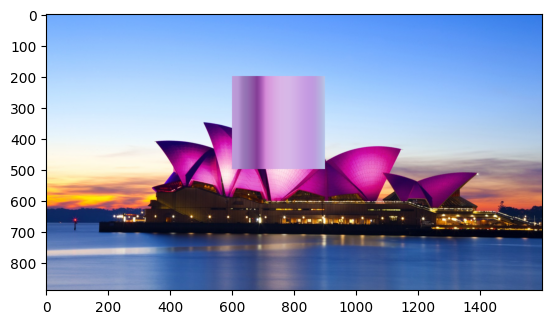

In [239]:
for i in range(0, 100):
    start = i * 3
    end = (i + 1) * 3
    sub[:, start:end, 0] = np.mean(sub[:, start:end, 0])
    sub[:, start:end, 1] = np.mean(sub[:, start:end, 1])
    sub[:, start:end, 2] = np.mean(sub[:, start:end, 2])    
    
plt.imshow(mosaic)

In [240]:
# read as 2D array
image_2D = io.imread('./data/opera-house.jpg', as_gray=True)

In [241]:
image_2D.shape

(890, 1600)

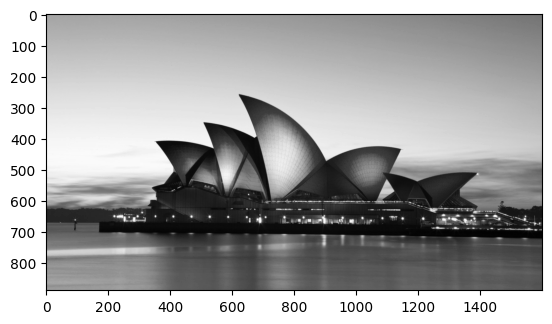

In [244]:
plt.imshow(image_2D, cmap='gray')